In [1]:
# Import all the libraries:

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, least_squares
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date

In [2]:
# Wells dataset
# well_D18 = pd.read_csv('Johan Sverdrup DP/NO162D18-2.csv',sep=';')
# well_D6 = pd.read_csv('Johan Sverdrup DP/NO162D6-4.csv',sep=';')
# well_D20 = pd.read_csv('Johan Sverdrup DP/NO162D20-6.csv',sep=';')
# well_D23 = pd.read_csv('Johan Sverdrup DP/NO162D23-3.csv',sep=';')
# well_D41 = pd.read_csv('Johan Sverdrup DP/NO162D41-5.csv',sep=';')
well_D42 = pd.read_csv('Johan Sverdrup DP/NO162D42-1.csv',sep=';')

df = well_D42
print('shape:', df.shape)

df

shape: (106113, 16)


C:\Users\renan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


depthBit depthBit.1             depthHole depthHole.1  \
0                      INDEX      VALUE                 INDEX       VALUE   
1                       time          m                  time           m   
2       2020-10-05T11:02:41Z        0.0  2020-10-05T11:02:42Z         0.0   
3       2020-10-05T11:02:42Z        0.0  2020-10-05T11:02:44Z         0.0   
4       2020-10-05T11:02:44Z        0.0  2020-10-05T11:02:45Z         0.0   
...                      ...        ...                   ...         ...   
106108                   NaN        NaN  2020-10-07T23:59:50Z       891.3   
106109                   NaN        NaN  2020-10-07T23:59:52Z       891.3   
106110                   NaN        NaN  2020-10-07T23:59:55Z       891.3   
106111                   NaN        NaN  2020-10-07T23:59:58Z       891.3   
106112                   NaN        NaN  2020-10-08T00:00:00Z       891.3   

                         rpm  rpm.1                torque torque.1  \
0                      INDEX  VALUE                 INDEX    VALUE   
1                       time  rev/s                  time      N.m   
2       2020-10-05T11:02:42Z    0.0  2020-10-05T11:02:42Z      0.0   
3       2020-10-05T11:02:44Z    0.0  2020-10-05T11:02:44Z      0.0   
4       2020-10-05T11:02:47Z    0.0  2020-10-05T11:02:47Z      0.0   
...                      ...    ...                   ...      ...   
106108                   NaN    NaN                   NaN      NaN   
106109                   NaN    NaN                   NaN      NaN   
106110                   NaN    NaN                   NaN      NaN   
106111                   NaN    NaN                   NaN      NaN   
106112                   NaN    NaN                   NaN      NaN   

                 weightOnBit weightOnBit.1                velRop velRop.1  \
0                      INDEX         VALUE                 INDEX    VALUE   
1                       time             N                  time      m/s   
2       2020-10-05T11:02:42Z           0.0  2020-10-05T11:02:42Z      0.0   
3       2020-10-05T11:02:44Z           0.0  2020-10-05T11:02:44Z      0.0   
4       2020-10-05T11:02:47Z           0.0  2020-10-05T11:02:47Z      0.0   
...                      ...           ...                   ...      ...   
106108                   NaN           NaN                   NaN      NaN   
106109                   NaN           NaN                   NaN      NaN   
106110                   NaN           NaN                   NaN      NaN   
106111                   NaN           NaN                   NaN      NaN   
106112                   NaN           NaN                   NaN      NaN   

                      flowIn flowIn.1     standpipePressure  \
0                      INDEX    VALUE                 INDEX   
1                       time     m3/s                  time   
2       2020-10-05T11:02:42Z      0.0  2020-10-05T11:02:42Z   
3       2020-10-05T11:02:44Z      0.0  2020-10-05T11:02:44Z   
4       2020-10-05T11:02:47Z      0.0  2020-10-05T11:02:47Z   
...                      ...      ...                   ...   
106108                   NaN      NaN                   NaN   
106109                   NaN      NaN                   NaN   
106110                   NaN      NaN                   NaN   
106111                   NaN      NaN                   NaN   
106112                   NaN      NaN                   NaN   

       standpipePressure.1  
0                    VALUE  
1                       Pa  
2                  7805.89  
3                  8022.61  
4                  7869.69  
...                    ...  
106108                 NaN  
106109                 NaN  
106110                 NaN  
106111                 NaN  
106112                 NaN  

[106113 rows x 16 columns]

In [3]:
# Columns name: 
df.columns = ['time_DB','Depth Bit[m]','time_DH','Depth Hole[m]','time_RPM','RPM[rev/s]','time_TOR','Torque[N.m]',
              'time_WOB','WOB[N]', 'time_ROP','ROP[m/s]','time_FR','Flow rate[m3/s]','time_SPP','Stand Pipe Pressure[Pa]' ]
df

time_DB Depth Bit[m]               time_DH Depth Hole[m]  \
0                      INDEX        VALUE                 INDEX         VALUE   
1                       time            m                  time             m   
2       2020-10-05T11:02:41Z          0.0  2020-10-05T11:02:42Z           0.0   
3       2020-10-05T11:02:42Z          0.0  2020-10-05T11:02:44Z           0.0   
4       2020-10-05T11:02:44Z          0.0  2020-10-05T11:02:45Z           0.0   
...                      ...          ...                   ...           ...   
106108                   NaN          NaN  2020-10-07T23:59:50Z         891.3   
106109                   NaN          NaN  2020-10-07T23:59:52Z         891.3   
106110                   NaN          NaN  2020-10-07T23:59:55Z         891.3   
106111                   NaN          NaN  2020-10-07T23:59:58Z         891.3   
106112                   NaN          NaN  2020-10-08T00:00:00Z         891.3   

                    time_RPM RPM[rev/s]              time_TOR Torque[N.m]  \
0                      INDEX      VALUE                 INDEX       VALUE   
1                       time      rev/s                  time         N.m   
2       2020-10-05T11:02:42Z        0.0  2020-10-05T11:02:42Z         0.0   
3       2020-10-05T11:02:44Z        0.0  2020-10-05T11:02:44Z         0.0   
4       2020-10-05T11:02:47Z        0.0  2020-10-05T11:02:47Z         0.0   
...                      ...        ...                   ...         ...   
106108                   NaN        NaN                   NaN         NaN   
106109                   NaN        NaN                   NaN         NaN   
106110                   NaN        NaN                   NaN         NaN   
106111                   NaN        NaN                   NaN         NaN   
106112                   NaN        NaN                   NaN         NaN   

                    time_WOB WOB[N]              time_ROP ROP[m/s]  \
0                      INDEX  VALUE                 INDEX    VALUE   
1                       time      N                  time      m/s   
2       2020-10-05T11:02:42Z    0.0  2020-10-05T11:02:42Z      0.0   
3       2020-10-05T11:02:44Z    0.0  2020-10-05T11:02:44Z      0.0   
4       2020-10-05T11:02:47Z    0.0  2020-10-05T11:02:47Z      0.0   
...                      ...    ...                   ...      ...   
106108                   NaN    NaN                   NaN      NaN   
106109                   NaN    NaN                   NaN      NaN   
106110                   NaN    NaN                   NaN      NaN   
106111                   NaN    NaN                   NaN      NaN   
106112                   NaN    NaN                   NaN      NaN   

                     time_FR Flow rate[m3/s]              time_SPP  \
0                      INDEX           VALUE                 INDEX   
1                       time            m3/s                  time   
2       2020-10-05T11:02:42Z             0.0  2020-10-05T11:02:42Z   
3       2020-10-05T11:02:44Z             0.0  2020-10-05T11:02:44Z   
4       2020-10-05T11:02:47Z             0.0  2020-10-05T11:02:47Z   
...                      ...             ...                   ...   
106108                   NaN             NaN                   NaN   
106109                   NaN             NaN                   NaN   
106110                   NaN             NaN                   NaN   
106111                   NaN             NaN                   NaN   
106112                   NaN             NaN                   NaN   

       Stand Pipe Pressure[Pa]  
0                        VALUE  
1                           Pa  
2                      7805.89  
3                      8022.61  
4                      7869.69  
...                        ...  
106108                     NaN  
106109                     NaN  
106110                     NaN  
106111                     NaN  
106112                     NaN  

[106113 rows x 16 columns]

In [5]:
df = df.drop(df.index[[0,1]])
df.index = list(range(df.shape[0]))
df

time_DB Depth Bit[m]               time_DH Depth Hole[m]  \
0       2020-10-05T11:02:44Z          0.0  2020-10-05T11:02:45Z           0.0   
1       2020-10-05T11:02:47Z          0.0  2020-10-05T11:02:47Z           0.0   
2       2020-10-05T11:02:50Z          0.0  2020-10-05T11:02:50Z           0.0   
3       2020-10-05T11:02:53Z          0.0  2020-10-05T11:02:53Z           0.0   
4       2020-10-05T11:02:56Z          0.0  2020-10-05T11:02:55Z           0.0   
...                      ...          ...                   ...           ...   
106104                   NaN          NaN  2020-10-07T23:59:50Z         891.3   
106105                   NaN          NaN  2020-10-07T23:59:52Z         891.3   
106106                   NaN          NaN  2020-10-07T23:59:55Z         891.3   
106107                   NaN          NaN  2020-10-07T23:59:58Z         891.3   
106108                   NaN          NaN  2020-10-08T00:00:00Z         891.3   

                    time_RPM RPM[rev/s]              time_TOR Torque[N.m]  \
0       2020-10-05T11:02:47Z        0.0  2020-10-05T11:02:47Z         0.0   
1       2020-10-05T11:02:50Z        0.0  2020-10-05T11:02:50Z         0.0   
2       2020-10-05T11:02:53Z        0.0  2020-10-05T11:02:53Z         0.0   
3       2020-10-05T11:02:56Z        0.0  2020-10-05T11:02:56Z         0.0   
4       2020-10-05T11:02:58Z        0.0  2020-10-05T11:02:58Z         0.0   
...                      ...        ...                   ...         ...   
106104                   NaN        NaN                   NaN         NaN   
106105                   NaN        NaN                   NaN         NaN   
106106                   NaN        NaN                   NaN         NaN   
106107                   NaN        NaN                   NaN         NaN   
106108                   NaN        NaN                   NaN         NaN   

                    time_WOB WOB[N]              time_ROP ROP[m/s]  \
0       2020-10-05T11:02:47Z    0.0  2020-10-05T11:02:47Z      0.0   
1       2020-10-05T11:02:50Z    0.0  2020-10-05T11:02:50Z      0.0   
2       2020-10-05T11:02:53Z    0.0  2020-10-05T11:02:53Z      0.0   
3       2020-10-05T11:02:56Z    0.0  2020-10-05T11:02:56Z      0.0   
4       2020-10-05T11:02:58Z    0.0  2020-10-05T11:02:58Z      0.0   
...                      ...    ...                   ...      ...   
106104                   NaN    NaN                   NaN      NaN   
106105                   NaN    NaN                   NaN      NaN   
106106                   NaN    NaN                   NaN      NaN   
106107                   NaN    NaN                   NaN      NaN   
106108                   NaN    NaN                   NaN      NaN   

                     time_FR Flow rate[m3/s]              time_SPP  \
0       2020-10-05T11:02:47Z             0.0  2020-10-05T11:02:47Z   
1       2020-10-05T11:02:50Z             0.0  2020-10-05T11:02:50Z   
2       2020-10-05T11:02:53Z             0.0  2020-10-05T11:02:53Z   
3       2020-10-05T11:02:56Z             0.0  2020-10-05T11:02:56Z   
4       2020-10-05T11:02:58Z             0.0  2020-10-05T11:02:58Z   
...                      ...             ...                   ...   
106104                   NaN             NaN                   NaN   
106105                   NaN             NaN                   NaN   
106106                   NaN             NaN                   NaN   
106107                   NaN             NaN                   NaN   
106108                   NaN             NaN                   NaN   

       Stand Pipe Pressure[Pa]  
0                      7869.69  
1                      7913.21  
2                      7864.19  
3                      7756.05  
4                      7970.55  
...                        ...  
106104                     NaN  
106105                     NaN  
106106                     NaN  
106107                     NaN  
106108                     NaN  

[106109 rows x 16 columns]

In [6]:
df.dtypes

time_DB                    object
Depth Bit[m]               object
time_DH                    object
Depth Hole[m]              object
time_RPM                   object
RPM[rev/s]                 object
time_TOR                   object
Torque[N.m]                object
time_WOB                   object
WOB[N]                     object
time_ROP                   object
ROP[m/s]                   object
time_FR                    object
Flow rate[m3/s]            object
time_SPP                   object
Stand Pipe Pressure[Pa]    object
dtype: object

In [7]:
# Convert in datetime and to numeric

df['time_DB'] = pd.to_datetime(df['time_DB'])
df['time_DH'] = pd.to_datetime(df['time_DH'])
df['time_RPM'] = pd.to_datetime(df['time_RPM'])
df['time_TOR'] = pd.to_datetime(df['time_TOR'])
df['time_WOB'] = pd.to_datetime(df['time_WOB'])
df['time_ROP'] = pd.to_datetime(df['time_ROP'])
df['time_FR'] = pd.to_datetime(df['time_FR'])
df['time_SPP'] = pd.to_datetime(df['time_SPP'])

df['Depth Bit[m]'] = pd.to_numeric(df['Depth Bit[m]'])
df['Depth Hole[m]'] = pd.to_numeric(df['Depth Hole[m]'])
df['RPM[rev/s]'] = pd.to_numeric(df['RPM[rev/s]'])
df['Torque[N.m]'] = pd.to_numeric(df['Torque[N.m]'])
df['WOB[N]'] = pd.to_numeric(df['WOB[N]'])
df['ROP[m/s]'] = pd.to_numeric(df['ROP[m/s]'])
df['Flow rate[m3/s]'] = pd.to_numeric(df['Flow rate[m3/s]'])
df['Stand Pipe Pressure[Pa]'] = pd.to_numeric(df['Stand Pipe Pressure[Pa]'])

df.dtypes

time_DB                    datetime64[ns, UTC]
Depth Bit[m]                           float64
time_DH                    datetime64[ns, UTC]
Depth Hole[m]                          float64
time_RPM                   datetime64[ns, UTC]
RPM[rev/s]                             float64
time_TOR                   datetime64[ns, UTC]
Torque[N.m]                            float64
time_WOB                   datetime64[ns, UTC]
WOB[N]                                 float64
time_ROP                   datetime64[ns, UTC]
ROP[m/s]                               float64
time_FR                    datetime64[ns, UTC]
Flow rate[m3/s]                        float64
time_SPP                   datetime64[ns, UTC]
Stand Pipe Pressure[Pa]                float64
dtype: object

In [8]:
df.describe()

Depth Bit[m]  Depth Hole[m]    RPM[rev/s]   Torque[N.m]         WOB[N]  \
count  90371.000000  106109.000000  77881.000000  77884.000000   77885.000000   
mean     331.116027     481.725479      0.170558   2831.095399   53406.338128   
std      317.254700     187.296017      0.354888   3949.009706   75311.491151   
min      -16.258600       0.000000      0.000000      0.000000  -89977.200000   
25%       21.935300     351.000000      0.000000     53.374000   10800.700000   
50%      344.365000     351.000000      0.000000    261.532000   52398.100000   
75%      612.207000     611.979788      0.000000   4803.660000   94237.300000   
max      891.281000     891.300000      1.182280  33614.900000  420014.000000   

           ROP[m/s]  Flow rate[m3/s]  Stand Pipe Pressure[Pa]  
count  77885.000000     77883.000000             7.788200e+04  
mean       0.002472         0.036499             6.322910e+06  
std        0.003618         0.037557             6.730481e+06  
min        0.000000         0.000000             4.513700e+03  
25%        0.000000         0.000000             1.023180e+04  
50%        0.000000         0.000000             2.603860e+05  
75%        0.005386         0.074956             1.319225e+07  
max        0.014492         0.088370             1.832730e+07

In [9]:
# Create dataframe for each parameter:
df_DB = pd.concat([df['time_DB'] , df['Depth Bit[m]'] ], join = 'outer', axis = 1) 
df_DH = pd.concat([df['time_DH'] , df['Depth Hole[m]'] ], join = 'outer', axis = 1)
df_RPM = pd.concat([df['time_RPM'] , df['RPM[rev/s]'] ], join = 'outer', axis = 1)
df_TOR = pd.concat([df['time_TOR'] , df['Torque[N.m]'] ], join = 'outer', axis = 1)
df_WOB = pd.concat([df['time_WOB'] , df['WOB[N]'] ], join = 'outer', axis = 1)
df_ROP = pd.concat([df['time_ROP'] , df['ROP[m/s]'] ], join = 'outer', axis = 1)
df_FR = pd.concat([df['time_FR'] , df['Flow rate[m3/s]'] ], join = 'outer', axis = 1)
df_SPP = pd.concat([df['time_SPP'] , df['Stand Pipe Pressure[Pa]'] ], join = 'outer', axis = 1)

df_ROP

time_ROP  ROP[m/s]
0      2020-10-05 11:02:47+00:00       0.0
1      2020-10-05 11:02:50+00:00       0.0
2      2020-10-05 11:02:53+00:00       0.0
3      2020-10-05 11:02:56+00:00       0.0
4      2020-10-05 11:02:58+00:00       0.0
...                          ...       ...
106104                       NaT       NaN
106105                       NaT       NaN
106106                       NaT       NaN
106107                       NaT       NaN
106108                       NaT       NaN

[106109 rows x 2 columns]

In [10]:
# Missing values per column:
df.isnull().sum(axis=0)

time_DB                    15738
Depth Bit[m]               15738
time_DH                        0
Depth Hole[m]                  0
time_RPM                   28228
RPM[rev/s]                 28228
time_TOR                   28225
Torque[N.m]                28225
time_WOB                   28224
WOB[N]                     28224
time_ROP                   28224
ROP[m/s]                   28224
time_FR                    28226
Flow rate[m3/s]            28226
time_SPP                   28227
Stand Pipe Pressure[Pa]    28227
dtype: int64

In [11]:
# using Dropna, delete all rows with missing values:
df_DB = df_DB.dropna()
df_DH = df_DH.dropna() 
df_RPM = df_RPM.dropna()
df_TOR = df_TOR.dropna()
df_WOB = df_WOB.dropna()
df_ROP = df_ROP.dropna()
df_FR = df_FR.dropna()
df_SPP = df_SPP.dropna()

In [12]:
# Check duplicates:

print('no. of duplicates DB', df_DB.duplicated().sum(axis=0))
print('no. of duplicates DH', df_DB.duplicated().sum(axis=0))
print('no. of duplicates RPM', df_RPM.duplicated().sum(axis=0))
print('no. of duplicates Torque', df_TOR.duplicated().sum(axis=0))
print('no. of duplicates WOB', df_WOB.duplicated().sum(axis=0))
print('no. of duplicates ROP', df_ROP.duplicated().sum(axis=0))
print('no. of duplicates FR', df_FR.duplicated().sum(axis=0))
print('no. of duplicates SPP', df_SPP.duplicated().sum(axis=0))


no. of duplicates DB 0
no. of duplicates DH 0
no. of duplicates RPM 0
no. of duplicates Torque 0
no. of duplicates WOB 0
no. of duplicates ROP 0
no. of duplicates FR 0
no. of duplicates SPP 0


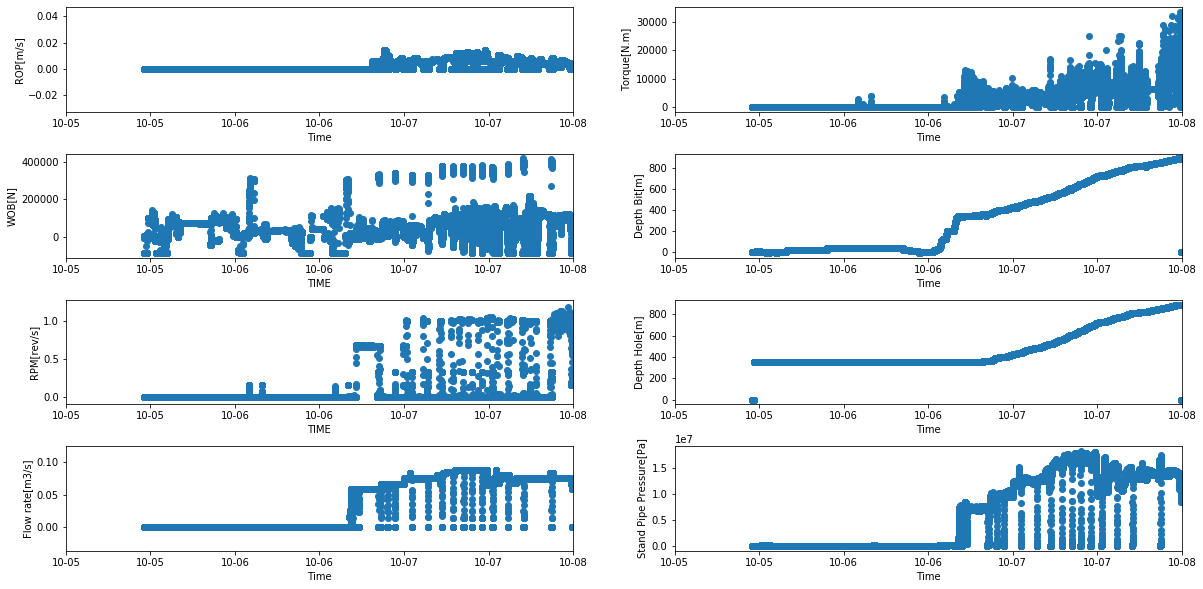

In [13]:
# Plot variables vs time:
date_form = DateFormatter("%m-%d")

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df_ROP['time_ROP'],df_ROP['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df_WOB['time_WOB'],df_WOB['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df_RPM['time_RPM'],df_RPM['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df_TOR['time_TOR'],df_TOR['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df_DB['time_DB'],df_DB['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df_DH['time_DH'],df_DH['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df_FR['time_FR'],df_FR['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df_SPP['time_SPP'],df_SPP['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

In [14]:
# First we change the name of column in all datasets:

df_DB = df_DB.rename(columns={'time_DB':'time'})
df_DH = df_DH.rename(columns={'time_DH':'time'})
df_RPM = df_RPM.rename(columns={'time_RPM':'time'})
df_ROP = df_ROP.rename(columns={'time_ROP':'time'})
df_WOB = df_WOB.rename(columns={'time_WOB':'time'})
df_TOR = df_TOR.rename(columns={'time_TOR':'time'})
df_FR = df_FR.rename(columns={'time_FR':'time'})
df_SPP = df_SPP.rename(columns={'time_SPP':'time'})

# Then we merge the dataframes:

df1 = pd.merge_asof(df_DH,df_DB,on='time', tolerance = pd.Timedelta('0.1s'))
df2 = pd.merge_asof(df_ROP, df_RPM, on='time', tolerance = pd.Timedelta('0.1s'))
df3 = pd.merge_asof(df_WOB, df_TOR, on='time', tolerance = pd.Timedelta('0.1s'))
df4 = pd.merge_asof(df_FR, df_SPP, on='time', tolerance = pd.Timedelta('0.1s'))
df5 = pd.merge_asof(df1, df2, on='time', tolerance = pd.Timedelta('0.1s'))
df6 = pd.merge_asof(df3, df4, on='time', tolerance = pd.Timedelta('0.1s'))
df_merged = pd.merge_asof(df5, df6, on='time', tolerance = pd.Timedelta('0.1s'))

df_merged.tail(20)

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
106089 2020-10-07 23:59:20+00:00          891.3    883.926728       NaN   
106090 2020-10-07 23:59:21+00:00          891.3    883.941000       0.0   
106091 2020-10-07 23:59:24+00:00          891.3    883.991000       0.0   
106092 2020-10-07 23:59:25+00:00          891.3           NaN       NaN   
106093 2020-10-07 23:59:27+00:00          891.3    884.042000       0.0   
106094 2020-10-07 23:59:30+00:00          891.3    884.108896       0.0   
106095 2020-10-07 23:59:32+00:00          891.3    884.153000       0.0   
106096 2020-10-07 23:59:35+00:00          891.3    884.218000       0.0   
106097 2020-10-07 23:59:38+00:00          891.3    884.283000       0.0   
106098 2020-10-07 23:59:40+00:00          891.3    884.326631       NaN   
106099 2020-10-07 23:59:41+00:00          891.3    884.349000       0.0   
106100 2020-10-07 23:59:44+00:00          891.3    884.414000       0.0   
106101 2020-10-07 23:59:45+00:00          891.3           NaN       NaN   
106102 2020-10-07 23:59:46+00:00          891.3    884.437000       0.0   
106103 2020-10-07 23:59:49+00:00          891.3    884.503000       0.0   
106104 2020-10-07 23:59:50+00:00          891.3    884.524153       NaN   
106105 2020-10-07 23:59:52+00:00          891.3    884.568000       0.0   
106106 2020-10-07 23:59:55+00:00          891.3    884.635000       0.0   
106107 2020-10-07 23:59:58+00:00          891.3    884.700000       0.0   
106108 2020-10-08 00:00:00+00:00          891.3    884.744813       0.0   

        RPM[rev/s]   WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
106089         NaN      NaN          NaN              NaN   
106090    0.680409  19278.3      8465.11         0.068240   
106091    0.632149  15334.0      9142.96         0.068275   
106092         NaN      NaN          NaN              NaN   
106093    0.732998  18578.0      5198.63         0.068594   
106094    0.714603  21143.7      6372.85         0.070526   
106095    0.721311  25301.1     11470.10         0.070561   
106096    0.703133  26753.2     12676.30         0.070526   
106097    0.697939  35414.4     14912.70         0.071677   
106098         NaN      NaN          NaN              NaN   
106099    0.698155  37402.2     12099.90         0.071695   
106100    0.676297  38943.7     10045.00         0.071961   
106101         NaN      NaN          NaN              NaN   
106102    0.683222  32234.0      6319.48         0.072794   
106103    0.679543  37470.7     13263.40         0.072670   
106104         NaN      NaN          NaN              NaN   
106105    0.675648  45701.8     18803.70         0.072723   
106106    0.667424  29061.0     15227.60         0.072758   
106107    0.647947  29044.3     15515.80         0.073804   
106108    0.682573  17448.6      4403.35         0.073751   

        Stand Pipe Pressure[Pa]  
106089                      NaN  
106090               11299100.0  
106091               11463900.0  
106092                      NaN  
106093               11568800.0  
106094               11774900.0  
106095               12162200.0  
106096               12185200.0  
106097               12196900.0  
106098                      NaN  
106099               12359600.0  
106100               12471300.0  
106101                      NaN  
106102               12670100.0  
106103               12580500.0  
106104                      NaN  
106105               12771500.0  
106106               12720100.0  
106107               12847100.0  
106108               12868400.0

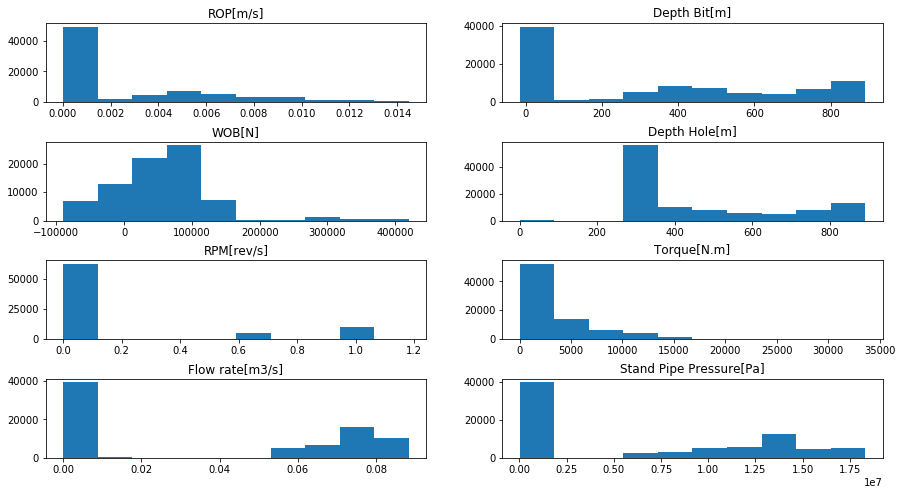

In [15]:
# Print all histograms:
fig2 = plt.figure(figsize=(15, 8))
grid = plt.GridSpec(4, 2, hspace=0.5)
ROP_hist = fig2.add_subplot(grid[0,0])
WOB_hist = fig2.add_subplot(grid[1, 0])
RPM_hist = fig2.add_subplot(grid[2, 0])
DB_hist = fig2.add_subplot(grid[0, 1])
DH_hist = fig2.add_subplot(grid[1, 1])
Tor_hist = fig2.add_subplot(grid[2, 1])
FR_hist = fig2.add_subplot(grid[3, 0])
SPP_hist = fig2.add_subplot(grid[3, 1])


ROP_hist.hist(df_ROP['ROP[m/s]'])
ROP_hist.set(title="ROP[m/s]")
WOB_hist.hist(df_WOB['WOB[N]'])
WOB_hist.set(title="WOB[N]")
RPM_hist.hist(df_RPM['RPM[rev/s]'])
RPM_hist.set(title='RPM[rev/s]')
DB_hist.hist(df_DB['Depth Bit[m]'])
DB_hist.set(title="Depth Bit[m]")
DH_hist.hist(df_DH['Depth Hole[m]'])
DH_hist.set(title="Depth Hole[m]")
Tor_hist.hist(df_TOR['Torque[N.m]'])
Tor_hist.set(title="Torque[N.m]")
FR_hist.hist(df_FR['Flow rate[m3/s]'])
FR_hist.set(title="Flow rate[m3/s]")
SPP_hist.hist(df_SPP['Stand Pipe Pressure[Pa]'])
SPP_hist.set(title="Stand Pipe Pressure[Pa]")


plt.show()

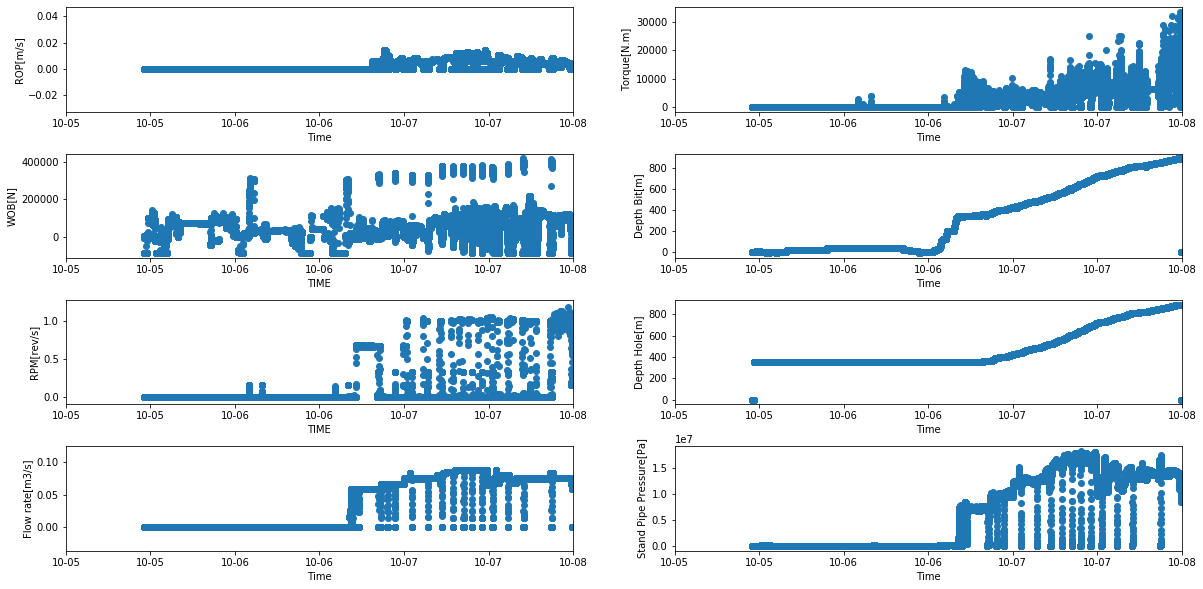

In [19]:
# Plot variables vs time:
df = df_merged
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'])
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df['time'],df['WOB[N]'] )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'])
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'])
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'])
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'])
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'])
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'])
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

In [16]:
# Interpolation:
df = df_merged
df_test = df
df_test['ROP[m/s]'] = df_test['ROP[m/s]'].interpolate()
df_test['WOB[N]'] = df_test['WOB[N]'].interpolate()
df_test['Torque[N.m]'] = df_test['Torque[N.m]'].interpolate()
df_test['RPM[rev/s]'] = df_test['RPM[rev/s]'].interpolate()
df_test['Depth Bit[m]'] = df_test['Depth Bit[m]'].interpolate()
df_test['Flow rate[m3/s]'] = df_test['Flow rate[m3/s]'].interpolate()
df_test['Stand Pipe Pressure[Pa]'] = df_test['Stand Pipe Pressure[Pa]'].interpolate()
df_test

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
0      2020-10-05 11:02:45+00:00            0.0           NaN       NaN   
1      2020-10-05 11:02:47+00:00            0.0      0.000000       0.0   
2      2020-10-05 11:02:50+00:00            0.0      0.000000       0.0   
3      2020-10-05 11:02:53+00:00            0.0      0.000000       0.0   
4      2020-10-05 11:02:55+00:00            0.0      0.000000       0.0   
...                          ...            ...           ...       ...   
106104 2020-10-07 23:59:50+00:00          891.3    884.524153       0.0   
106105 2020-10-07 23:59:52+00:00          891.3    884.568000       0.0   
106106 2020-10-07 23:59:55+00:00          891.3    884.635000       0.0   
106107 2020-10-07 23:59:58+00:00          891.3    884.700000       0.0   
106108 2020-10-08 00:00:00+00:00          891.3    884.744813       0.0   

        RPM[rev/s]    WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
0              NaN       NaN          NaN              NaN   
1         0.000000      0.00         0.00         0.000000   
2         0.000000      0.00         0.00         0.000000   
3         0.000000      0.00         0.00         0.000000   
4         0.000000      0.00         0.00         0.000000   
...            ...       ...          ...              ...   
106104    0.677596  41586.25     16033.55         0.072696   
106105    0.675648  45701.80     18803.70         0.072723   
106106    0.667424  29061.00     15227.60         0.072758   
106107    0.647947  29044.30     15515.80         0.073804   
106108    0.682573  17448.60      4403.35         0.073751   

        Stand Pipe Pressure[Pa]  
0                           NaN  
1                       7869.69  
2                       7913.21  
3                       7864.19  
4                       7810.12  
...                         ...  
106104              12676000.00  
106105              12771500.00  
106106              12720100.00  
106107              12847100.00  
106108              12868400.00  

[106109 rows x 9 columns]

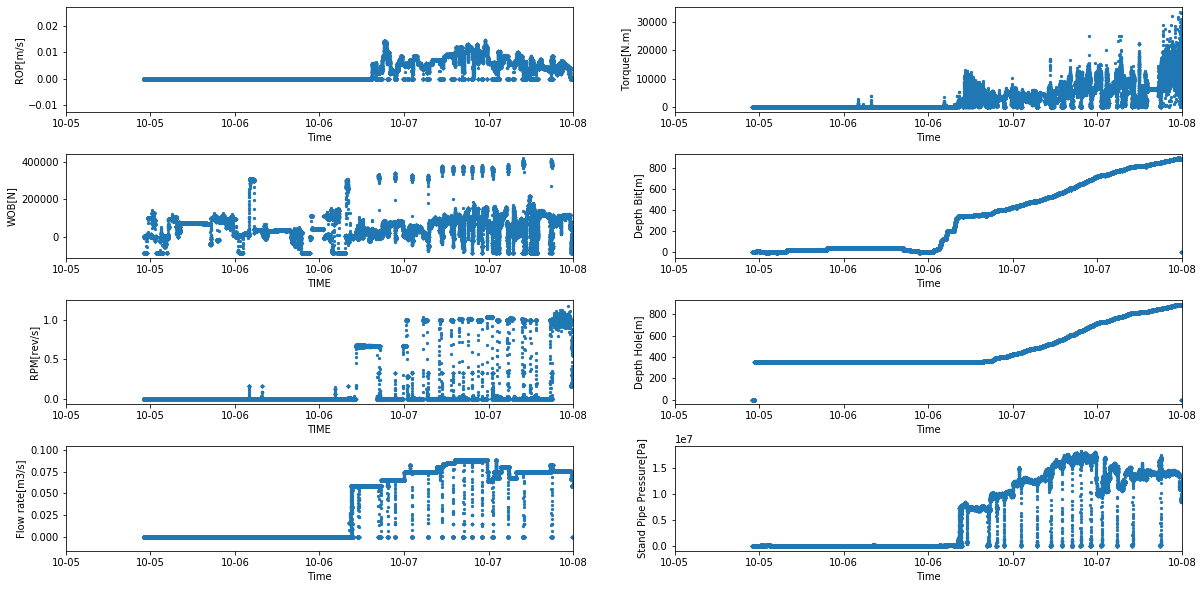

In [21]:
# Plot variables vs time after interpolation:
df = df_test
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

In [17]:
# Delete rows when ROP is 0
df = df_test
df = df[df['ROP[m/s]']>0]
df

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
56312  2020-10-06 19:25:50+00:00     351.000000    351.000000  0.000013   
56313  2020-10-06 19:25:51+00:00     351.001556    351.000000  0.000026   
56314  2020-10-06 19:25:54+00:00     351.002578    351.003000  0.000043   
56315  2020-10-06 19:25:55+00:00     351.003962    350.989500  0.000054   
56316  2020-10-06 19:25:56+00:00     351.003962    350.976000  0.000066   
...                          ...            ...           ...       ...   
105629 2020-10-07 23:38:13+00:00     891.280730    891.261000  0.000032   
105630 2020-10-07 23:38:15+00:00     891.280730    891.245000  0.000017   
105631 2020-10-07 23:38:16+00:00     891.280730    891.229000  0.000003   
105632 2020-10-07 23:38:18+00:00     891.280730    891.192000  0.000003   
105633 2020-10-07 23:38:20+00:00     891.280730    891.152465  0.000002   

        RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
56312     0.669696  37351.050     3026.305         0.058281   
56313     0.669588  37518.900     3303.850         0.058299   
56314     0.670670  40843.200     2460.540         0.058263   
56315     0.670886  39184.050     2212.350         0.058263   
56316     0.671103  37524.900     1964.160         0.058263   
...            ...        ...          ...              ...   
105629    1.011520  12418.100     9084.250         0.076001   
105630    1.013580   1269.205     9086.920         0.075992   
105631    1.015640  -9879.690     9089.590         0.075983   
105632    0.977331 -19506.600    11592.800         0.075983   
105633    0.985879 -25535.600    11261.900         0.075975   

        Stand Pipe Pressure[Pa]  
56312                 7212895.0  
56313                 7332610.0  
56314                 7148670.0  
56315                 7074155.0  
56316                 6999640.0  
...                         ...  
105629               13386800.0  
105630               13444600.0  
105631               13502400.0  
105632               13416700.0  
105633               13419750.0  

[39884 rows x 9 columns]

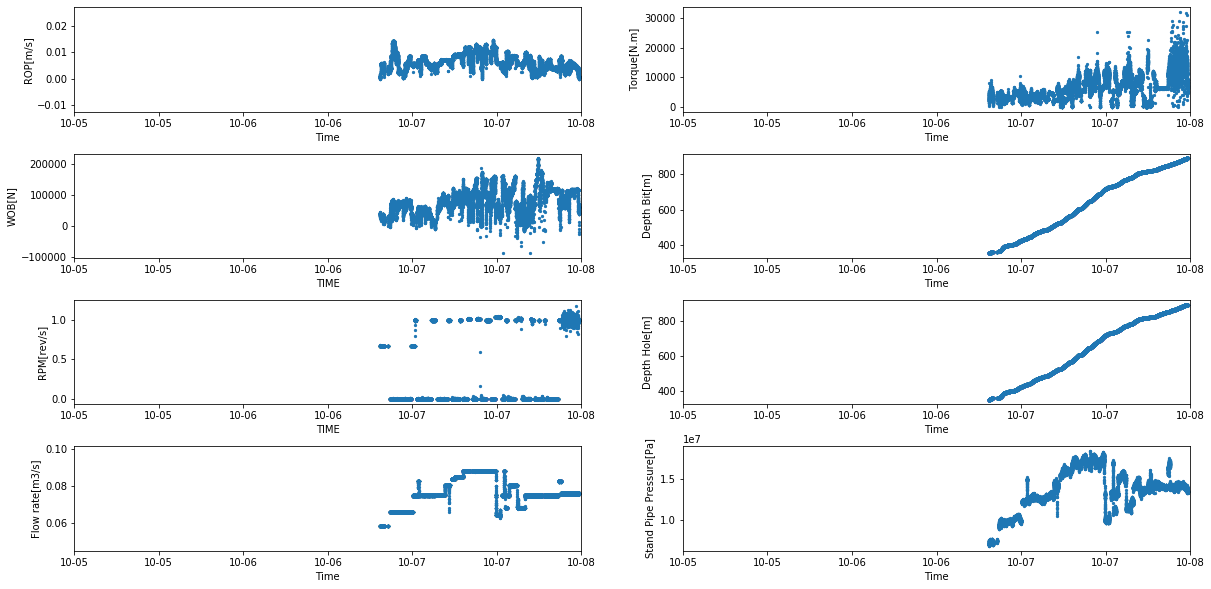

In [23]:
# Plot variables vs time after interpolation:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

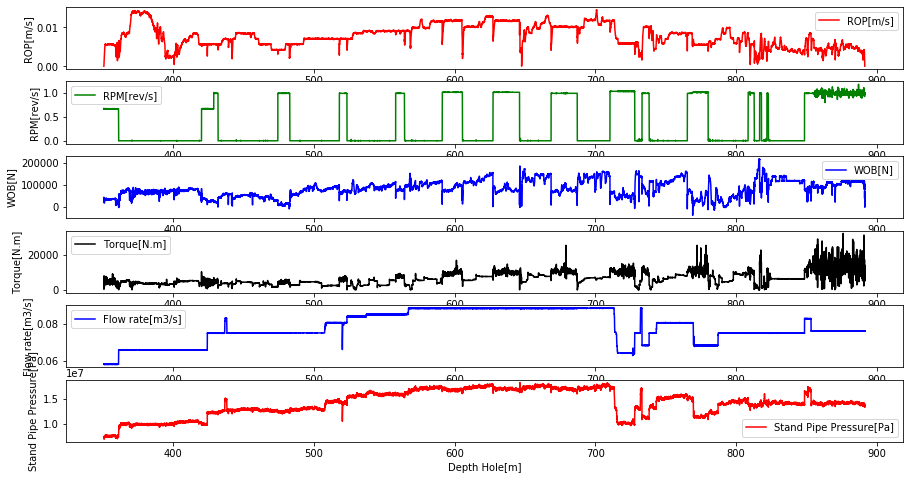

In [18]:
# Plot data vs depth (since the relationship is almost lineal) after interpolation:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)
plt.show()

In [19]:
# Removing outliers

Q1_ROP = df['ROP[m/s]'].quantile(0.25)
Q3_ROP = df['ROP[m/s]'].quantile(0.85)
IQR_ROP = Q3_ROP - Q1_ROP

Q1_RPM = df['RPM[rev/s]'].quantile(0.25)
Q3_RPM = df['RPM[rev/s]'].quantile(0.75)
IQR_RPM = Q3_RPM - Q1_RPM

Q1_TOR = df['Torque[N.m]'].quantile(0.25)
Q3_TOR= df['Torque[N.m]'].quantile(0.75)
IQR_TOR = Q3_TOR - Q1_TOR


Q1_WOB = df['WOB[N]'].quantile(0.25)
Q3_WOB = df['WOB[N]'].quantile(0.75)
IQR_WOB = Q3_WOB - Q1_WOB

Q1_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.25)
Q3_SPP = df['Stand Pipe Pressure[Pa]'].quantile(0.75)
IQR_SPP = Q3_SPP - Q1_SPP

Q1_FR = df['Flow rate[m3/s]'].quantile(0.25)
Q3_FR= df['Flow rate[m3/s]'].quantile(0.75)
IQR_FR = Q3_FR - Q1_FR


df_test_out = df.query('(@Q1_ROP-1.5*@IQR_ROP)<=`ROP[m/s]`<=(@Q3_ROP+1.5*@IQR_ROP)')

df_test_out = df.query('(@Q1_RPM-1.5*@IQR_RPM)<=`RPM[rev/s]`<=(@Q3_RPM+1.5*@IQR_RPM)')

df_test_out = df.query('(@Q1_TOR-1.5*@IQR_TOR)<=`Torque[N.m]`<=(@Q3_TOR+1.5*@IQR_TOR)')

df_test_out = df.query('(@Q1_WOB-1.5*@IQR_WOB)<=`WOB[N]`<=(@Q3_WOB+1.5*@IQR_WOB)')

df_test_out = df.query('(@Q1_SPP-1.5*@IQR_SPP)<=`Stand Pipe Pressure[Pa]`<=(@Q3_SPP+1.5*@IQR_SPP)')

df_test_out = df.query('(@Q1_FR-1.5*@IQR_FR)<=`Flow rate[m3/s]`<=(@Q3_FR+1.5*@IQR_FR)')

df_test_out

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
64453  2020-10-07 00:05:10+00:00     424.453690    424.453690  0.002613   
64454  2020-10-07 00:05:12+00:00     424.456455    424.456000  0.005226   
64455  2020-10-07 00:05:14+00:00     424.456554    424.457000  0.005038   
64456  2020-10-07 00:05:15+00:00     424.456577    424.457000  0.004902   
64457  2020-10-07 00:05:17+00:00     424.457371    424.457000  0.004767   
...                          ...            ...           ...       ...   
105629 2020-10-07 23:38:13+00:00     891.280730    891.261000  0.000032   
105630 2020-10-07 23:38:15+00:00     891.280730    891.245000  0.000017   
105631 2020-10-07 23:38:16+00:00     891.280730    891.229000  0.000003   
105632 2020-10-07 23:38:18+00:00     891.280730    891.192000  0.000003   
105633 2020-10-07 23:38:20+00:00     891.280730    891.152465  0.000002   

        RPM[rev/s]     WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
64453     0.667857  29832.100      4918.41         0.074876   
64454     0.670670  24953.700      3538.69         0.074832   
64455     0.673484  16720.700      1665.27         0.074849   
64456     0.673160  12905.910      1502.48         0.074894   
64457     0.672835   9091.120      1339.69         0.074938   
...            ...        ...          ...              ...   
105629    1.011520  12418.100      9084.25         0.076001   
105630    1.013580   1269.205      9086.92         0.075992   
105631    1.015640  -9879.690      9089.59         0.075983   
105632    0.977331 -19506.600     11592.80         0.075983   
105633    0.985879 -25535.600     11261.90         0.075975   

        Stand Pipe Pressure[Pa]  
64453                12203650.0  
64454                12400800.0  
64455                12215000.0  
64456                12121900.0  
64457                12028800.0  
...                         ...  
105629               13386800.0  
105630               13444600.0  
105631               13502400.0  
105632               13416700.0  
105633               13419750.0  

[32888 rows x 9 columns]

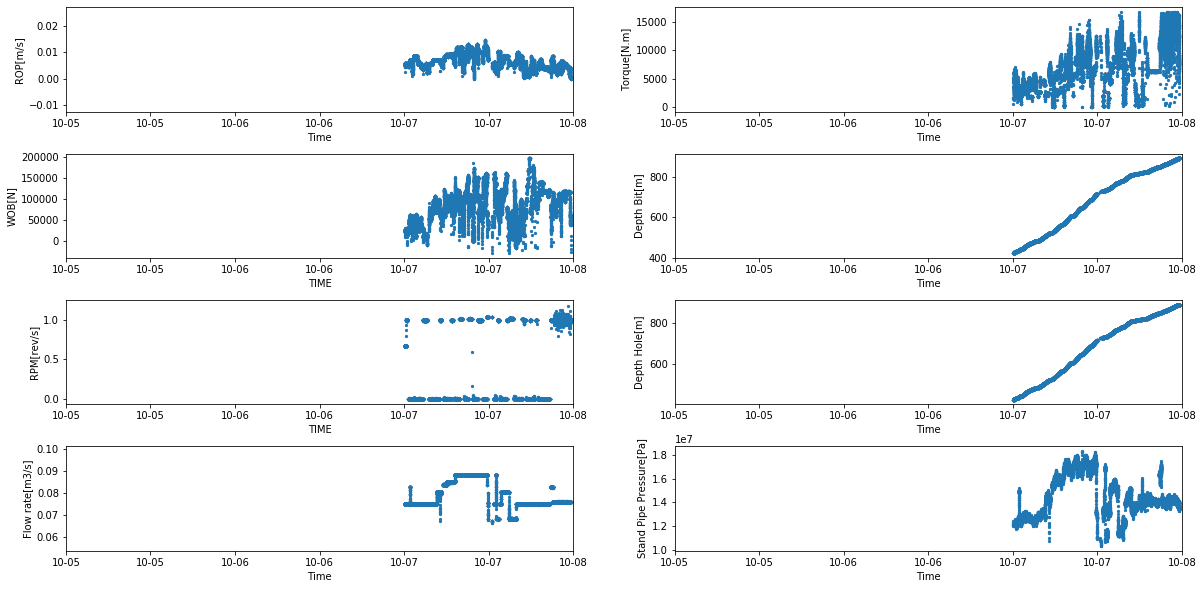

In [26]:
# Plot variables vs time after removing outliers:

fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

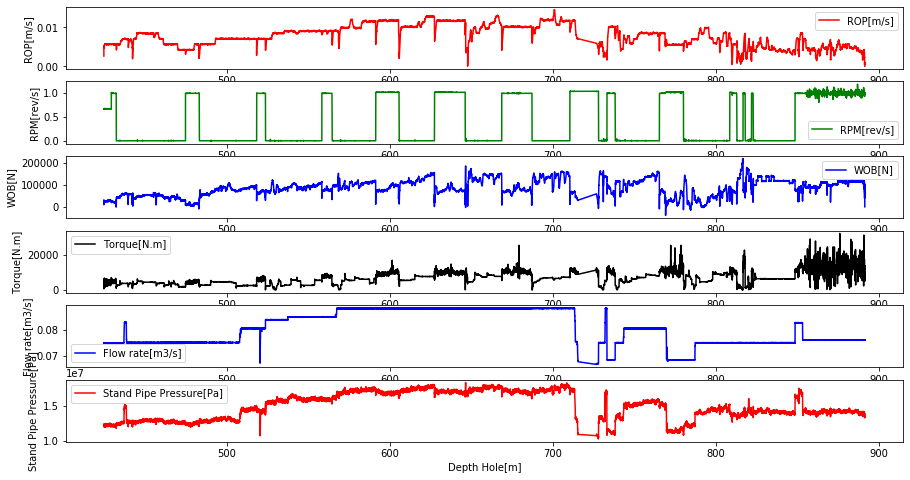

In [20]:
# Plot data vs depth (since the relationship is almost lineal) after removing outliers:

fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df_test_out['Depth Hole[m]'] , df_test_out['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

In [21]:
# Noise reduction (window = 30):
df = df_test_out
df_test2 = df
df_test2['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 30, center=True).mean()
df_test2['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 30, center=True).mean()
df_test2['WOB[N]'] = df['WOB[N]'].rolling(window = 30, center=True).mean()
df_test2['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 30, center=True).mean()
df_test2['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 30, center=True).mean()
df_test2['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 30, center=True).mean()
df_test2.dropna(inplace = True)

# Noise reduction (window = 40):
df_test4 = df
df_test4['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test4['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test4['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test4['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test4['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 40, center=True).mean()
df_test4['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 40, center=True).mean()
df_test4.dropna(inplace = True)

# Noise reduction (window = 70):
df_test5 = df
df_test5['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 40, center=True).mean()
df_test5['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 40, center=True).mean()
df_test5['WOB[N]'] = df['WOB[N]'].rolling(window = 40, center=True).mean()
df_test5['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 40, center=True).mean()
df_test5['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 70, center=True).mean()
df_test5['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 70, center=True).mean()
df_test5.dropna(inplace = True)

# Noise reduction (window = 20):
df_test3 = df
df_test3['ROP[m/s]'] = df['ROP[m/s]'].rolling(window = 20, center=True).mean()
df_test3['RPM[rev/s]'] = df['RPM[rev/s]'].rolling(window = 20, center=True).mean()
df_test3['WOB[N]'] = df['WOB[N]'].rolling(window = 20, center=True).mean()
df_test3['Torque[N.m]'] = df['Torque[N.m]'].rolling(window = 20, center=True).mean()
df_test3['Flow rate[m3/s]'] = df['Flow rate[m3/s]'].rolling(window = 20, center=True).mean()
df_test3['Stand Pipe Pressure[Pa]'] = df['Stand Pipe Pressure[Pa]'].rolling(window = 20, center=True).mean()
df_test3.dropna(inplace = True)
df_test2

C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\renan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

time  Depth Hole[m]  Depth Bit[m]  ROP[m/s]  \
64533  2020-10-07 00:07:54+00:00     425.328255    425.328000  0.005667   
64534  2020-10-07 00:07:55+00:00     425.333771    425.337000  0.005668   
64535  2020-10-07 00:07:57+00:00     425.346188    425.346000  0.005669   
64536  2020-10-07 00:08:00+00:00     425.363228    425.363228  0.005670   
64537  2020-10-07 00:08:02+00:00     425.374905    425.375000  0.005671   
...                          ...            ...           ...       ...   
105553 2020-10-07 23:35:36+00:00     891.219800    891.220000  0.000820   
105554 2020-10-07 23:35:39+00:00     891.223878    891.224000  0.000823   
105555 2020-10-07 23:35:40+00:00     891.225579    891.225579  0.000827   
105556 2020-10-07 23:35:42+00:00     891.227162    891.227000  0.000830   
105557 2020-10-07 23:35:44+00:00     891.227167    891.227000  0.000834   

        RPM[rev/s]        WOB[N]  Torque[N.m]  Flow rate[m3/s]  \
64533     0.669509  23831.101220  4288.618473         0.074898   
64534     0.669518  23850.447256  4284.471727         0.074897   
64535     0.669527  23870.772845  4280.431496         0.074897   
64536     0.669534  23892.013693  4276.538523         0.074897   
64537     0.669541  23914.107450  4272.830938         0.074897   
...            ...           ...          ...              ...   
105553    0.992344  58326.407706  8122.016632         0.076022   
105554    0.992424  58499.926888  8127.819619         0.076022   
105555    0.992496  58671.749091  8133.852126         0.076022   
105556    0.992559  58840.169501  8139.974855         0.076022   
105557    0.992616  59003.565786  8146.051350         0.076022   

        Stand Pipe Pressure[Pa]  
64533              1.219674e+07  
64534              1.219682e+07  
64535              1.219690e+07  
64536              1.219700e+07  
64537              1.219711e+07  
...                         ...  
105553             1.349663e+07  
105554             1.349618e+07  
105555             1.349579e+07  
105556             1.349545e+07  
105557             1.349517e+07  

[32732 rows x 9 columns]

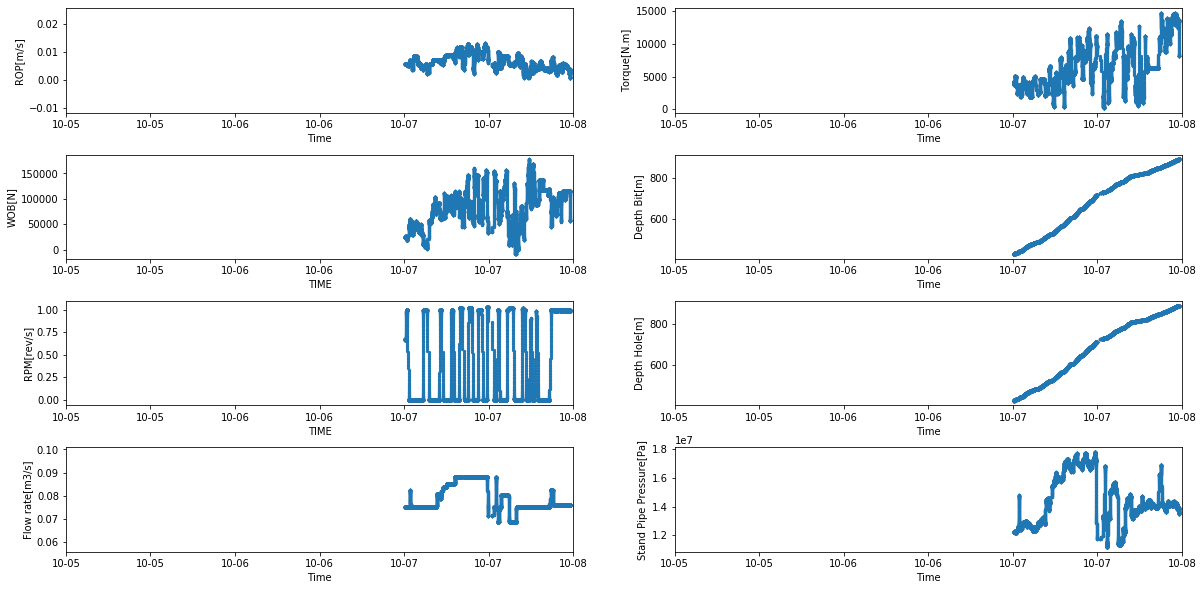

In [29]:
# Plot variables vs time after removing NOISE:
df = df_test2
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

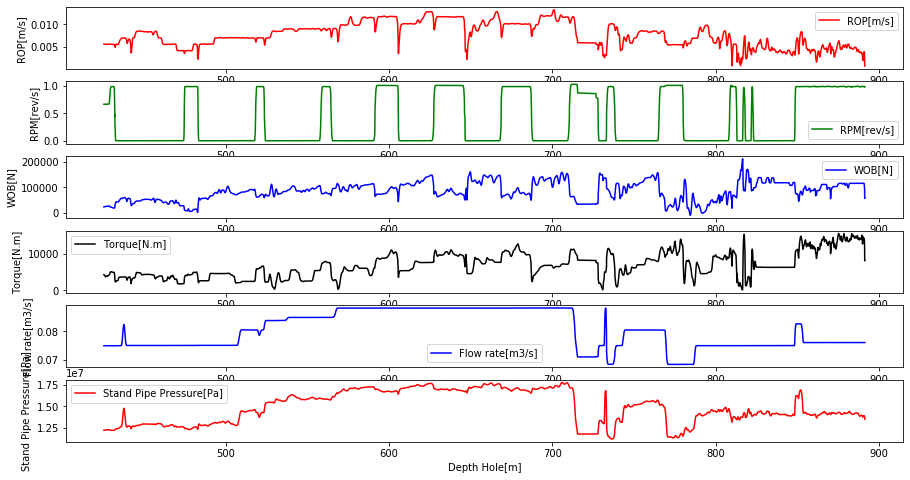

In [23]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE:
df = df_test2
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

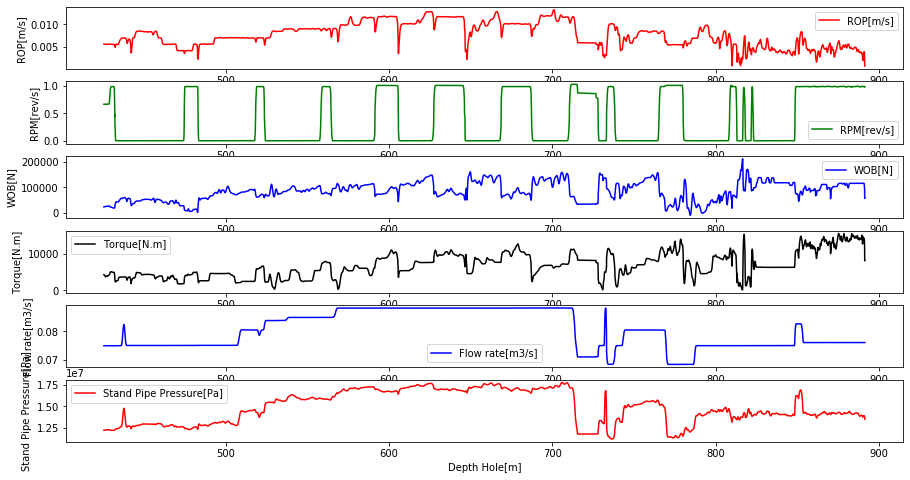

In [22]:
# Plot data vs depth (since the relationship is almost lineal) after removing NOISE(window 70):
df = df_test5
fig,axis =plt.subplots(nrows =6, figsize =(15,8)) 
sns.lineplot(df['Depth Hole[m]'] , df['ROP[m/s]'], ax = axis[0], label ="ROP[m/s]",color ='red', ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['RPM[rev/s]'], ax = axis[1], label ="RPM[rev/s]", color ='green',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['WOB[N]'], ax = axis[2], label ="WOB[N]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Torque[N.m]'], ax = axis[3], label ="Torque[N.m]", color ='black',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Flow rate[m3/s]'], ax = axis[4], label ="Flow rate[m3/s]", color ='blue',ci = None)
sns.lineplot(df['Depth Hole[m]'] , df['Stand Pipe Pressure[Pa]'], ax = axis[5], label ="Stand Pipe Pressure[Pa]", color ='red',ci = None)

plt.show()

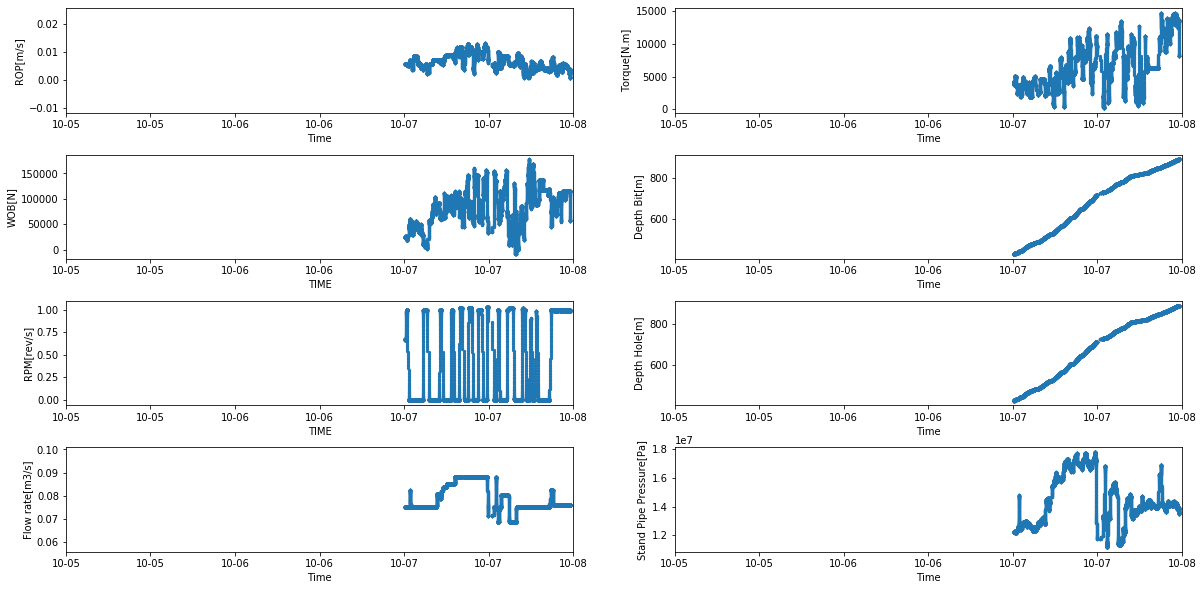

In [31]:
# Plot variables vs time after removing NOISE (window 70):
df = df_test5
fig = plt.figure(figsize=(20, 10))
grid = plt.GridSpec(4, 2, hspace=0.4)

ROP_t = fig.add_subplot(grid[0, 0])
WOB_t = fig.add_subplot(grid[1, 0])
RPM_t = fig.add_subplot(grid[2, 0])
TOR_t = fig.add_subplot(grid[0, 1])
DB_t = fig.add_subplot(grid[1, 1])
DH_t = fig.add_subplot(grid[2, 1])
FR_t = fig.add_subplot(grid[3, 0])
SPP_t = fig.add_subplot(grid[3, 1])

ROP_t.scatter(df['time'],df['ROP[m/s]'],s=5)
ROP_t.set(xlabel="Time", ylabel="ROP[m/s]")
ROP_t.xaxis.set_major_formatter(date_form)
ROP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

WOB_t.scatter(df['time'],df['WOB[N]'],s=5 )
WOB_t.set(xlabel="TIME", ylabel="WOB[N]")
WOB_t.xaxis.set_major_formatter(date_form)
WOB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

RPM_t.scatter(df['time'],df['RPM[rev/s]'],s=5)
RPM_t.set(xlabel="TIME", ylabel="RPM[rev/s]")
RPM_t.xaxis.set_major_formatter(date_form)
RPM_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

TOR_t.scatter(df['time'],df['Torque[N.m]'],s=5)
TOR_t.set(xlabel="Time", ylabel="Torque[N.m]")
TOR_t.xaxis.set_major_formatter(date_form)
TOR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DB_t.scatter(df['time'],df['Depth Bit[m]'],s=5)
DB_t.set(xlabel="Time", ylabel="Depth Bit[m]")
DB_t.xaxis.set_major_formatter(date_form)
DB_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

DH_t.scatter(df['time'],df['Depth Hole[m]'],s=5)
DH_t.set(xlabel="Time", ylabel="Depth Hole[m]")
DH_t.xaxis.set_major_formatter(date_form)
DH_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

FR_t.scatter(df['time'],df['Flow rate[m3/s]'],s=5)
FR_t.set(xlabel="Time", ylabel="Flow rate[m3/s]")
FR_t.xaxis.set_major_formatter(date_form)
FR_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

SPP_t.scatter(df['time'],df['Stand Pipe Pressure[Pa]'],s=5)
SPP_t.set(xlabel="Time", ylabel="Stand Pipe Pressure[Pa]")
SPP_t.xaxis.set_major_formatter(date_form)
SPP_t.set_xlim(datetime(2020, 10, 5), datetime(2020, 10, 8))

plt.show()

In [24]:
# Create new csv file with data cleaned
df = df_test2

df.to_csv(r'Cleaned wells/NO162D42-1.csv', index = False, header=True)